**Disciplina: ACA052 - Meteorología Sinótica I**

Monitor: M.Sc Student Ronald Guiuseppi Ramírez Nina

Institute of Astronomy, Geophysics and Atmospheric Sciences - University of São Paulo, Brazil

File: Aula_02.ipynb

**Baseado na aula prática do Meteorol. Me. Willy Hagi (MeteoNorte)

**Sistema de Observação Global**

É um sistema coordinado de métodos para realizar observações meteorológicas e ambientais a escala mundial em apoio de todos os programas da OMM. Esse sistema é constituido por: satélites, radares, radiossondas e estações meteorológicas de superfície.


O sistema mundial integrado de sistemas de observação da OMM (WIGOS) atua como coordinador dessas redes de observação, e através do sistema de informação da OMM (SIO), conecta todas as regiões para que possam trocar, gestionar e processar dados.

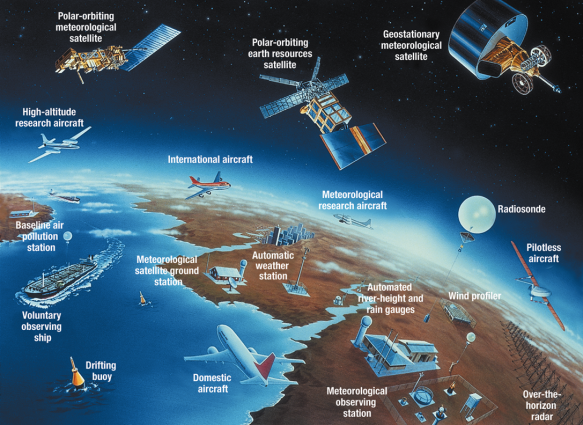

**Objetivos**

- Aprender sobre o pacote "HydroBR"
- Acessar à base de dados HISTÓRICA na nuvem das instituções INMET, ONS, ANA
- Fazer climogramas das variáveis meteorológicas.

# **1. HydroBr para acesso aos dados das Estações do INMET**

O HydroBr é um pacote criado por Wallisson Carvalho e é feito para quem trabalha com séries temporais hidrometeorológicas das rede do Instituto Nacional de Meteorologia (INMET), da Agência Nacional de Águas (ANA) e do Operador Nacional do Sistema Elétrico (ONS). 

Link HydroBr: https://github.com/wallissoncarvalho/hydrobr

Wallison Carvalho: https://github.com/wallissoncarvalho/hydrobr


Instalar o pacote "hydrobr", no Google colab.

In [1]:
# Instalando o hydrobr no colab
!pip install hydrobr

  Created wheel for hydrobr: filename=hydrobr-0.1.1-py3-none-any.whl size=15091 sha256=768d19d66000d7be8611c8ee8f1186121cccacc143abff692548d579880258b6
  Stored in directory: /root/.cache/pip/wheels/93/b2/26/9a3caf037f15e9ffea73655bc741a306a3e82a69b2e71db19f
Successfully built hydrobr


Importar o pacote "hydrobr" e montar o drive

In [2]:
# Importando o pacote hydrobr
print("1. Importando os pacotes")
import hydrobr

# Importar pacote para montar o drive e ter acesso aos dados em nosso drive
print("2. Montando o drive para acesso aos dados")
from google.colab import drive
drive.mount('/content/drive')

print("3. Terminou de ler os pacotes")

1. Importando os pacotes
2. Montando o drive para acesso aos dados
Mounted at /content/drive
3. Terminou de ler os pacotes


Nesta aula prática serão utilizados os dados da rede de observações das **estações meteorológicas automáticas (EMA)** do INMET. 

Criar uma variável que vai armazenar os dados da rede do INMET das EMA

- hydrobr.get_data: é um módulo para a obtenção de dados
- INMET: é uma classe dentro do mudo hydrobr.get_data
- lis_stations: é uma função da classe INMET, tem três opcções ("automatic", "conventional" e "both")

In [3]:
# ema <- estação meteorológica automática da rede do INMET
inmet_list_ema = hydrobr.get_data.INMET.list_stations(station_type = 'automatic') 

Ver o tipo de nossa variável *inmet_list_ema* que armazena os dados da rede das EMA

In [4]:
# Olhando o tipo da nossa variável inmet_list_ems
type(inmet_list_ema)

pandas.core.frame.DataFrame

Ver as primeiras filas de nosso DataFrame ("inmet_list_ema")

In [5]:
# Olhanco o emcabeçado de nosso df
inmet_list_ema.head()

,Code,Type,Name,State,Latitude,Longitude,Height,Start Operation,End Operation
0,A422,Automatic,ABROLHOS,BA,-17.96305555,-38.70333333,20.93,2008-07-20 21:00:00-03:00,In operation
1,A360,Automatic,ACARAU,CE,-3.1211111,-40.08722221,67.15,2009-04-21 21:00:00-03:00,In operation
2,A657,Automatic,AFONSO CLAUDIO,ES,-20.10416666,-41.10694444,507.48,2011-09-23 21:00:00-03:00,In operation
3,A908,Automatic,AGUA BOA,MT,-14.01638888,-52.21166666,440,2006-12-15 21:00:00-03:00,In operation
4,A756,Automatic,AGUA CLARA,MS,-20.44444444,-52.87583332,323.63,2010-08-13 21:00:00-03:00,In operation


Observar todas as colunas dentro de nosso DataFrame 

In [6]:
# Olhando o nome das colunas do df
inmet_list_ema.columns

Index(['Code', 'Type', 'Name', 'State', 'Latitude', 'Longitude', 'Height',
       'Start Operation', 'End Operation'],
      dtype='object')

O Dataframe têm informações de toda a rede de EMA do INMET. Para o objetivo desta aula prática, vamos a centrar nosso foco em um estado em específico. 

Para fazer isso a função *groupby* do Pandas tem a capacidade de filtrar dados. Como resultado final, as EMA do INMET serão agrupados por estados em uma nova variável ("inmet_estado_ema").

In [7]:
# Filtrando o df através do nome do Estado com o "groupby()"
inmet_estado_ema = inmet_list_ema.groupby("State")
# Objeto criado do tipo DataFrameGroupby
inmet_estado_ema

Observado as agrupações feitas das EMA por estado. Cada um delas vai representar um estado e grupo diferente e serão utilizados como filtro de dados por estado.

In [8]:
# Acessando ao objeto inmet_estado_ema
inmet_estado_ema.groups.keys()

dict_keys(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'])

Extrair a rede das EMA para o estado de São Paulo (SP). O resultado vai ser um DataFrame com os dados da rede de EMA de SP.

In [9]:
# Extraindo um subset do df para São Paulo
inmet_ema_sp = inmet_estado_ema.get_group('RS')
inmet_ema_sp.head() 

,Code,Type,Name,State,Latitude,Longitude,Height,Start Operation,End Operation
9,A826,Automatic,ALEGRETE,RS,-29.709083,-55.525486,120.88,2006-09-27 21:00:00-03:00,In operation
47,A827,Automatic,BAGE,RS,-31.34777777,-54.01333333,226.19,2007-01-03 21:00:00-03:00,In operation
70,A840,Automatic,BENTO GONCALVES,RS,-29.164581,-51.534202,623.27,2006-11-30 21:00:00-03:00,In operation
94,A812,Automatic,CACAPAVA DO SUL,RS,-30.54527777,-53.46694443,420.82,2006-06-21 21:00:00-03:00,In operation
102,A838,Automatic,CAMAQUA,RS,-30.807953,-51.83424,92.3,2006-12-11 21:00:00-03:00,In operation


Observado as EMA disponíveis no estado de SP

In [10]:
# Olhando as EMA disponíveis
list(inmet_ema_sp['Name'])

['ALEGRETE',
 'BAGE',
 'BENTO GONCALVES',
 'CACAPAVA DO SUL',
 'CAMAQUA',
 'CAMBARA DO SUL',
 'CAMPO BOM',
 'CANELA',
 'CANGUCU',
 'CAPAO DO LEAO (PELOTAS)',
 'CRUZ ALTA',
 'DOM PEDRITO',
 'ENCRUZILHADA DO SUL',
 'ERECHIM',
 'FREDERICO WESTPHALEN',
 'IBIRUBA',
 'JAGUARAO',
 'LAGOA VERMELHA',
 'MOSTARDAS',
 'PALMEIRA DAS MISSOES',
 'PASSO FUNDO',
 'PORTO ALEGRE',
 'QUARAI',
 'RIO GRANDE',
 'RIO PARDO',
 'SANTA MARIA',
 'SANTA ROSA',
 'SANTANA DO LIVRAMENTO',
 'SANTIAGO',
 'SANTO AUGUSTO',
 'SAO BORJA',
 'SAO GABRIEL',
 'SAO JOSE DOS AUSENTES',
 'SAO LUIZ GONZAGA',
 'SAO VICENTE DO SUL',
 'SERAFINA CORREA',
 'SOLEDADE',
 'Santa Vitoria do Palmar - Barra do Chui',
 'TEUTONIA',
 'TORRES',
 'TRAMANDAI',
 'TUPANCIRETA',
 'URUGUAIANA',
 'VACARIA']

Para acessar aos dados com o **HydroBr** é necessário saber o **código da estação**. Neste caso, primeiro vamos a verificar se o nome da EMA existe no DataFrame. Se existe, vai retornar o código da EMA.  

In [36]:
# Para acessar a uma ems, é só possível com o código da ems para ser utilizada com o hydrobr
if 'QUARAI' in list(inmet_ema_sp['Name']):
  indice = list(inmet_ema_sp['Name']).index('QUARAI')
  print('O código da ems é:', list(inmet_ema_sp['Code'])[indice])

O código da ems é: A831


Com o código da EMA, podemos acessar aos dados com a função **hourly_data()** do HydroBr. Neste caso vamos a utilizar dados horários mediante essa função **hourly_data( )** porque estão disponíveis. No caso de estações convencionais não apresentam dados horários e precisariamos de utilizar a função **daily_data( )**

In [41]:
# Com o código da estação, podemos acessar aos dados. No caso das EMA apresentam dados horários
# e portanto é possível utilizar a função ".hourly_data()"
# No caso das convencionais, os dados estão na escala diária e a função a utilizar é "daily_data()"
bauru_sp_A705 = hydrobr.get_data.INMET.hourly_data('A831')

1it [00:03,  3.72s/it]


Exception: ignored

In [ ]:
bauru_sp_A705

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
2001-08-30 10:00:00,None,None,None,None,None,None,None,None,None,947.6,None,None,None,None,None,0,0
2001-08-30 11:00:00,None,None,None,None,None,None,None,None,None,946.9,947.6,946.7,None,None,None,0,0
2001-08-30 12:00:00,None,None,None,None,None,None,None,None,None,946.6,946.9,946.6,None,None,None,None,0
2001-08-30 13:00:00,None,None,None,None,None,None,None,None,None,945.5,946.6,945.5,None,None,None,None,0
2001-08-30 14:00:00,35.3,35.3,29.8,32,48,32,16.3,17.6,15.8,944.3,945.2,944.3,None,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-12 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-12 13:00:00,22.2,22.4,21.2,89,95,89,20.4,20.7,19.9,941.7,941.9,941.6,0.2,266,2.6,641.6,0
2022-04-12 14:00:00,25,25,22.2,77,91,76,20.7,21.2,19.9,941.3,941.7,941.3,1,267,4.2,1432.7,0
2022-04-12 15:00:00,28.4,28.4,25,63,78,62,20.7,21.6,20.1,940.8,941.3,940.8,1.4,232,6,2642.7,0


Todas as estações retornam as seguintes variáveis:

- T: Temperatura (Tinst, Tmax e Tmin) [C];

- RH: Umidade Relativa (RHins, RHmax e RHmin) [%];

- DP: Temperatura do Ponto de Orvalho (DPinst, DPmax, DPmin) [C];

- P: Pressão Atmosférica (Pinst, Pmax, Pmin) [hPa];

- Wspeed: Velocidade do Vento [m/s];

- Wdir: Direção do Vento [º];

- Rad: Radiação [kJ/m²];

- Prec: Precipitação [mm].



O HydroBr apresenta três funções:
- fdc() <- cria uma curva de permanência de dados de vazão
- gantt() <- cria um gráfico de Gantt com o Plotly
- spatial_stations() <- cria um mapa com a distribuição espacial das estações

Criando um gráfico de Gantt para observar o histórico de recopilação de dados e os períodos de ausência de dados. 

In [ ]:
# Criando um gráfico de Gantt para olhar a disponibilidade dos dados
# Importando o pacote plotly no colab
import plotly.offline

In [ ]:
# Para criar gráficos com plotly no colab ou jupyter notebook, é preciso fazer
plotly.offline.init_notebook_mode(connected=True)

Graficando o diagrama de Gantt para a EMA Bauru A705

In [ ]:
# Criando o gráfico de Gantt
gantt = hydrobr.Plot.gantt(bauru_sp_A705)

# Edição dos eixos
gantt.update_layout(xaxis_title = 'Ano', yaxis_title = 'Variáveis',\
                    title = 'Gráfico de Gantt - EMS Automática de Bauru A705 - SP')

# Apresentando o plot
plotly.offline.plot(gantt)
gantt.show(renderer = "colab")

**Processar DataFrames com Pandas**

Antes de começar a trbalhar diretamente com os dados das EMAs, precisamos de fazer alguns pre-procesamento com o DataFrame. O primeiro deles é transforma o formato do horário. Os dados das EMAs estão no formato *Universal Time Coordinated (UTC), portanto precisamos mudar isso no horário local (SP: UTC - 3).

Importando os pacotes "pandas" e "pytz". O "pytz" tem uma lista de horários locais do globo

In [ ]:
# Procenando o df com o pacote pandas

# Importando os pacotes pandas e pytz
import pytz # tem uma lista de horários do globo
import pandas as pd

Mostrar os fusos horários globais

In [ ]:
# Apresentando os fusos horários
pytz.all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

No DataFrame com os dados da EMA de Bauru as datas estão como um *index* desse DataFrame e não como uma coluna.

In [ ]:
# Olhando o index de nosso df bauru_sp_A705
bauru_sp_A705.index

DatetimeIndex(['2001-08-30 10:00:00', '2001-08-30 11:00:00',
               '2001-08-30 12:00:00', '2001-08-30 13:00:00',
               '2001-08-30 14:00:00', '2001-08-30 15:00:00',
               '2001-08-30 16:00:00', '2001-08-30 17:00:00',
               '2001-08-30 18:00:00', '2001-08-30 19:00:00',
               ...
               '2022-04-12 07:00:00', '2022-04-12 08:00:00',
               '2022-04-12 09:00:00', '2022-04-12 10:00:00',
               '2022-04-12 11:00:00', '2022-04-12 12:00:00',
               '2022-04-12 13:00:00', '2022-04-12 14:00:00',
               '2022-04-12 15:00:00', '2022-04-12 16:00:00'],
              dtype='datetime64[ns]', length=180727, freq='H')

Antes de converter as datas no formato de horário local, é necessário especificar que os tempos estão no formato UTC. Mediante a seguinte função é possível fazer isso: **.tz_localize(pytz.utc)**

In [ ]:
# Vamoc converter os horários de UTC para HL

# Configurando o tempo em UTC
bauru_sp_A705.index.tz_localize(pytz.utc)

DatetimeIndex(['2001-08-30 10:00:00+00:00', '2001-08-30 11:00:00+00:00',
               '2001-08-30 12:00:00+00:00', '2001-08-30 13:00:00+00:00',
               '2001-08-30 14:00:00+00:00', '2001-08-30 15:00:00+00:00',
               '2001-08-30 16:00:00+00:00', '2001-08-30 17:00:00+00:00',
               '2001-08-30 18:00:00+00:00', '2001-08-30 19:00:00+00:00',
               ...
               '2022-04-12 07:00:00+00:00', '2022-04-12 08:00:00+00:00',
               '2022-04-12 09:00:00+00:00', '2022-04-12 10:00:00+00:00',
               '2022-04-12 11:00:00+00:00', '2022-04-12 12:00:00+00:00',
               '2022-04-12 13:00:00+00:00', '2022-04-12 14:00:00+00:00',
               '2022-04-12 15:00:00+00:00', '2022-04-12 16:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=180727, freq='H')

Agora podemos converter ao fuso horário correspondente mediante a função **tz_convert()**. No caso de Bauru o fuso horário correspondete é UTC - 3 (fuso horário de São Paulo). A seguinte função é aplicável: **pytz.timezone('America/Sao_Paulo')**.

In [ ]:
# Conversão para HL
bauru_sp_A705 = bauru_sp_A705.set_index(bauru_sp_A705.index.tz_localize(pytz.utc).tz_convert(pytz.timezone('America/Sao_Paulo')))


Como os dados são obtidos com o HydroBr é necessário fazer uma conversão do DataFrame para poder fazer uso de funções e calcular médias, somas, e outros, portanto o DataFrame é convertido para um tipo numérico. 

In [ ]:
# Convertendo o df bauru_sp_A705 para um tipo numérico
bauru_sp_A705 = bauru_sp_A705.apply(pd.to_numeric, errors = 'coerce')

In [ ]:
bauru_sp_A705.head()

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
2001-08-30 07:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,947.6,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2001-08-30 08:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,946.9,947.6,946.7,NaN,NaN,NaN,0.0,0.0
2001-08-30 09:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,946.6,946.9,946.6,NaN,NaN,NaN,NaN,0.0
2001-08-30 10:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,945.5,946.6,945.5,NaN,NaN,NaN,NaN,0.0
2001-08-30 11:00:00-03:00,35.3,35.3,29.8,32.0,48.0,32.0,16.3,17.6,15.8,944.3,945.2,944.3,NaN,NaN,NaN,NaN,0.0


Instalando o pacote proplot

In [ ]:
# Importando o pacote proplot
!pip install proplot

     |████████████████████████████████| 8.0 MB 5.3 MB/s 


# **Ciclo Diurno**
Com os dados horários gerados pela EMA é possível fazer análise de ciclos diurnos para um local em específico e ver seu **comportamento** ao longo do dia. 

Definindo um novo DataFrame com as médias horárias (composição - composite) de todas as variáveis meteoirológicas da EMA. Para isso serão utilizadas os seguintes comandos:
- gropuby(): Função do Pandas para agrupar (em nosso caso agrupamento por cada hora)
- mean(): Calcula a média de cada agrupamento (média de cada grupo horário)  

In [ ]:
# Ciclo diurno

# Definindo um novo df para obter as médias horárias das variáveis meteorológicas 
bauru_media_horaria = bauru_sp_A705.groupby(bauru_sp_A705.index.hour).mean() 

In [ ]:
bauru_media_horaria

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
0,19.434858,20.060113,19.259030,78.982475,80.163484,75.922528,15.436492,15.733954,15.157569,943.759805,943.972326,943.598139,1.266758,160.542373,4.217000,6.878442,0.175445
1,19.018227,19.599483,18.859328,80.680446,81.719684,77.865727,15.392058,15.666238,15.156791,943.498738,943.849392,943.428269,1.286025,160.874086,4.278297,5.695689,0.160459
2,18.640766,19.174008,18.493099,82.279467,83.195750,79.693811,15.361197,15.599116,15.158322,943.116431,943.557236,943.064138,1.256988,160.850183,4.269778,3.974530,0.142451
3,18.296605,18.774212,18.158015,83.602058,84.492286,81.347826,15.288773,15.522908,15.122892,942.755244,943.169382,942.696894,1.239296,160.264257,4.179262,2.542400,0.144661
4,17.997103,18.426197,17.865782,84.760244,85.573842,82.784418,15.229137,15.447379,15.080175,942.574310,942.846103,942.470337,1.227570,160.454254,4.079942,-0.141180,0.112703
5,17.726139,18.122512,17.600564,85.851910,86.543005,83.993890,15.179086,15.366928,15.032320,942.642219,942.766509,942.426997,1.200489,160.503588,4.003283,-2.530268,0.114220
6,17.504150,17.847193,17.376396,86.714443,87.425946,85.143082,15.131837,15.313431,14.998351,942.991791,943.042133,942.578575,1.186088,161.442966,3.914174,-2.923753,0.107295
7,17.555264,17.756310,17.240043,86.688148,87.942305,85.590630,15.184062,15.309478,14.978655,943.549374,943.579362,942.963380,1.212951,160.979664,3.891636,28.523076,0.100645
8,18.878382,18.918498,17.491955,82.206720,87.182416,81.751564,15.625369,15.722481,15.118601,944.157522,944.188357,943.533648,1.441344,162.543511,4.196365,328.268976,0.107544
9,20.718009,20.785370,18.846798,75.474809,82.564590,74.806689,16.008244,16.256275,15.457272,944.667128,944.706646,944.145705,1.769534,164.204014,4.802885,936.750264,0.096045


Importando os pacotes para gerar gráficos: 
- proplot
- matplotlib.pyplot

In [ ]:
# Importando os pacotes para fazer os gráficos
import proplot as plot
import matplotlib.pyplot as plt

# Ignorando warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/proplot/__init__.py:71: ProplotWarning:

Rebuilding font cache. This usually happens after installing or updating proplot.



Fazendo o primer gráfico de ciclo diurno da variável de Radiação

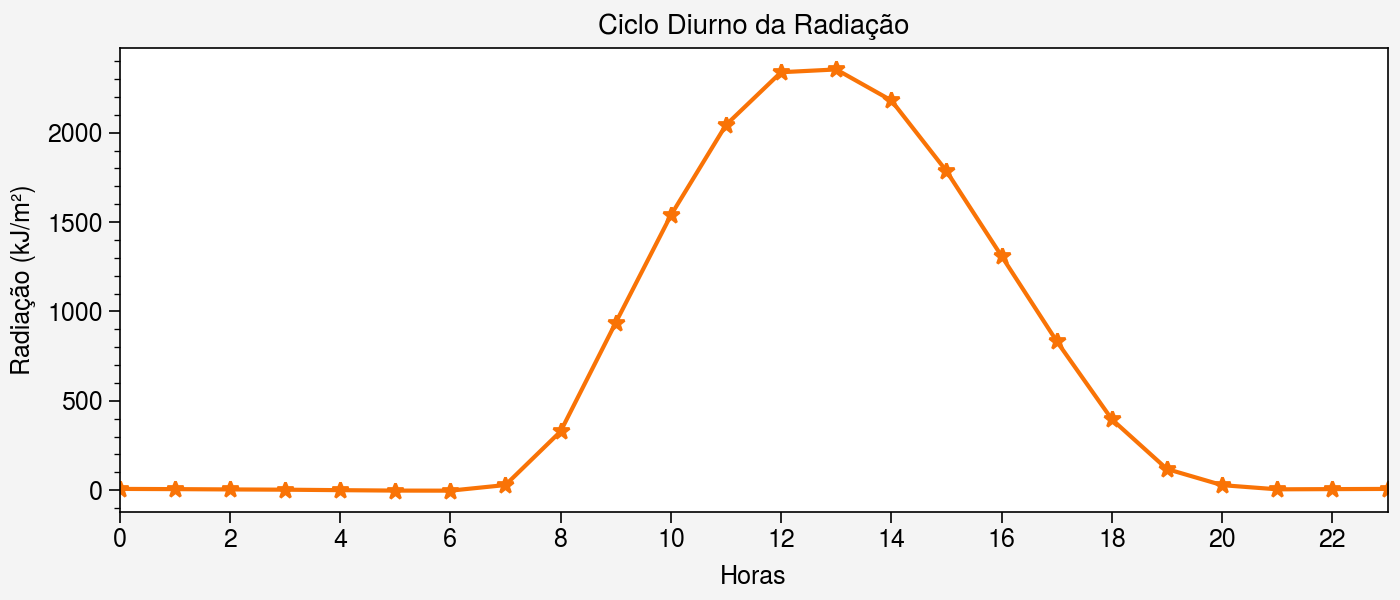

In [ ]:
# Ciclo diurno da radiação
fig, ax = plot.subplots(figsize = (7,3), tight = True)

# Plotar um gráfico de tipo linha
ax.plot(plot.arange(0,23,1), bauru_media_horaria['Rad'],
        color = 'orange', marker = '*')

# Edição dos eixos
ax.format(xlabel = 'Horas', ylabel = 'Radiação (kJ/m²)', title = 'Ciclo Diurno da Radiação',\
          xticks = 2, xtickminor = False, grid = False)

plt.show()

Fazer subplots com o pacote **proplot** utilizando funcionalidades do **matplotlib**

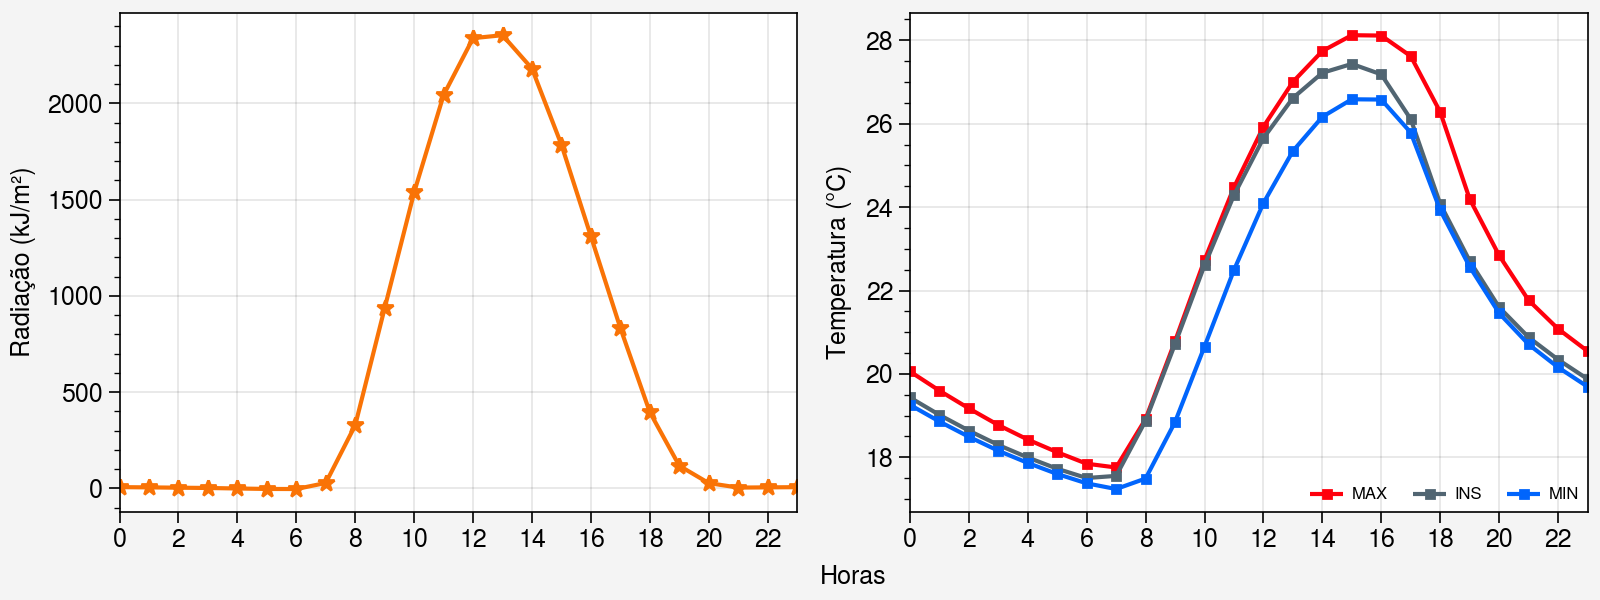

In [ ]:
# Fazendo subplots com o Proplot

fig, ax = plot.subplots(figsize = (8,3), ncols = 2, sharey = False, tight = True)

# Radiação
ax[0].plot(plot.arange(0,23,1), bauru_media_horaria['Rad'], color = 'orange', marker = '*')
ax[0].format(xlabel = 'Horas', ylabel = 'Radiação (kJ/m²)', xticks = 2, xtickminor = False)

# Temperaturas
ax[1].plot(plot.arange(0,23,1), bauru_media_horaria['Tmax'], color = 'bright red', marker = 's',
           markersize = 3, label = 'MAX')
ax[1].plot(plot.arange(0,23,1), bauru_media_horaria['Tins'], color = 'slate', marker = 's',
           markersize = 3, label = 'INS')
ax[1].plot(plot.arange(0,23,1), bauru_media_horaria['Tmin'], color = 'bright blue', marker = 's',
           markersize = 3, label = 'MIN')
ax[1].format(xlabel = 'Horas', ylabel = 'Temperatura ($\degree$C)', xticks = 2, xtickminor = False)

# Legendas
ax[1].legend(frameon = False, loc = 'lr', prop = {'size':6},)

plt.show()

# **Dados diários**

Pasando para uma escala de tempo "diária"

A função **pd.Grouper()** é outra forma de agrupar valores:
- Grouper() -> pode ser utilizado em diferentes frequências: freq='1W', freq='15D', freq='1M', e outros.

In [ ]:
# Dados Diários

# Grouper() pode agrupar em diferentes frequências: freq='1W', freq='15D'

bauru_media_diaria = bauru_sp_A705.groupby(pd.Grouper(freq = '1D')).mean()

In [ ]:
bauru_media_diaria.index

DatetimeIndex(['2001-08-30 00:00:00-03:00', '2001-08-31 00:00:00-03:00',
               '2001-09-01 00:00:00-03:00', '2001-09-02 00:00:00-03:00',
               '2001-09-03 00:00:00-03:00', '2001-09-04 00:00:00-03:00',
               '2001-09-05 00:00:00-03:00', '2001-09-06 00:00:00-03:00',
               '2001-09-07 00:00:00-03:00', '2001-09-08 00:00:00-03:00',
               ...
               '2022-04-03 00:00:00-03:00', '2022-04-04 00:00:00-03:00',
               '2022-04-05 00:00:00-03:00', '2022-04-06 00:00:00-03:00',
               '2022-04-07 00:00:00-03:00', '2022-04-08 00:00:00-03:00',
               '2022-04-09 00:00:00-03:00', '2022-04-10 00:00:00-03:00',
               '2022-04-11 00:00:00-03:00', '2022-04-12 00:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', length=7531, freq='D')

No caso da variável **precipitação** ela não está sendo bem processada. No caso da precipitação diária é necessário fazer um **acumulado diário** e não uma média.

In [ ]:
# acumulados de precipitação diários
bauru_pp_diaria = bauru_sp_A705['Prec'].groupby(pd.Grouper(freq = '1D')).sum()

In [ ]:
bauru_pp_diaria

2001-08-30 00:00:00-03:00    15.0
2001-08-31 00:00:00-03:00     4.4
2001-09-01 00:00:00-03:00     0.0
2001-09-02 00:00:00-03:00     0.0
2001-09-03 00:00:00-03:00     0.0
                             ... 
2022-04-08 00:00:00-03:00     0.0
2022-04-09 00:00:00-03:00     0.0
2022-04-10 00:00:00-03:00     0.0
2022-04-11 00:00:00-03:00     0.0
2022-04-12 00:00:00-03:00     0.0
Freq: D, Name: Prec, Length: 7531, dtype: float64

Substituindo a coluna de precipitação média diária por a precipitação acumulada diária.

In [ ]:
# Substituindo a coluna do DF bauru_media_diaria pelos valores de bauru_pp_diaria
bauru_media_diaria['Prec'] = bauru_pp_diaria.values

In [ ]:
bauru_media_diaria

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
2001-08-30 00:00:00-03:00,25.077778,26.412500,24.350000,58.111111,62.333333,53.125000,15.700000,16.450000,15.212500,945.330769,945.400000,944.933333,0.733333,74.333333,1.700000,-0.875000,15.0
2001-08-31 00:00:00-03:00,23.243478,23.682609,22.413043,62.956522,66.782609,61.043478,15.343478,15.800000,14.926087,946.039130,946.247826,945.813043,1.769565,80.478261,3.660870,815.478261,4.4
2001-09-01 00:00:00-03:00,24.287500,25.112500,23.470833,56.916667,60.833333,53.041667,14.525000,15.129167,13.770833,944.887500,945.116667,944.766667,1.333333,135.583333,3.304167,811.416667,0.0
2001-09-02 00:00:00-03:00,24.254167,24.945833,23.500000,56.291667,59.291667,52.708333,14.362500,14.925000,13.683333,943.895833,944.125000,943.691667,1.612500,113.125000,3.945833,822.958333,0.0
2001-09-03 00:00:00-03:00,24.250000,24.970833,23.541667,52.166667,55.333333,49.208333,13.108333,13.829167,12.462500,942.866667,943.070833,942.654167,1.395833,81.625000,3.462500,822.125000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-08 00:00:00-03:00,27.566667,28.066667,26.100000,64.222222,69.555556,62.333333,20.111111,20.611111,19.277778,941.955556,942.400000,941.855556,1.355556,250.333333,5.377778,1532.333333,0.0
2022-04-09 00:00:00-03:00,28.711111,29.211111,27.233333,62.111111,69.000000,59.333333,20.577778,21.155556,19.822222,941.844444,942.333333,941.766667,1.044444,194.555556,4.322222,1611.722222,0.0
2022-04-10 00:00:00-03:00,27.722222,28.344444,26.444444,60.666667,67.444444,58.000000,19.033333,20.077778,18.466667,941.322222,941.766667,941.211111,1.544444,194.888889,4.988889,1764.788889,0.0
2022-04-11 00:00:00-03:00,27.488889,27.933333,26.177778,59.111111,64.111111,54.555556,18.655556,19.033333,17.355556,940.166667,940.655556,940.044444,1.355556,257.000000,4.766667,1744.866667,0.0


Como o novo DataFrame com a coluna de precipitação acumulada diária corrigida vamos a fazer um estudo de caso seleccionando uma data específica.

In [ ]:
# Fazendo um estudo de caso
bauru_pp_diaria_2015 = bauru_media_diaria['Prec']['2015-01-01 00:00:00-03:00':"2015-12-31 00:00:00-03:00"]

In [ ]:
bauru_pp_diaria_2015

2015-01-02 00:00:00-02:00     0.6
2015-01-03 00:00:00-02:00     0.8
2015-01-04 00:00:00-02:00     0.0
2015-01-05 00:00:00-02:00    19.0
2015-01-06 00:00:00-02:00    21.0
                             ... 
2015-12-27 00:00:00-02:00     7.6
2015-12-28 00:00:00-02:00    29.4
2015-12-29 00:00:00-02:00    15.6
2015-12-30 00:00:00-02:00    27.6
2015-12-31 00:00:00-02:00     1.2
Freq: D, Name: Prec, Length: 364, dtype: float64

Gerando o gráfico para nosso estudo de caso:

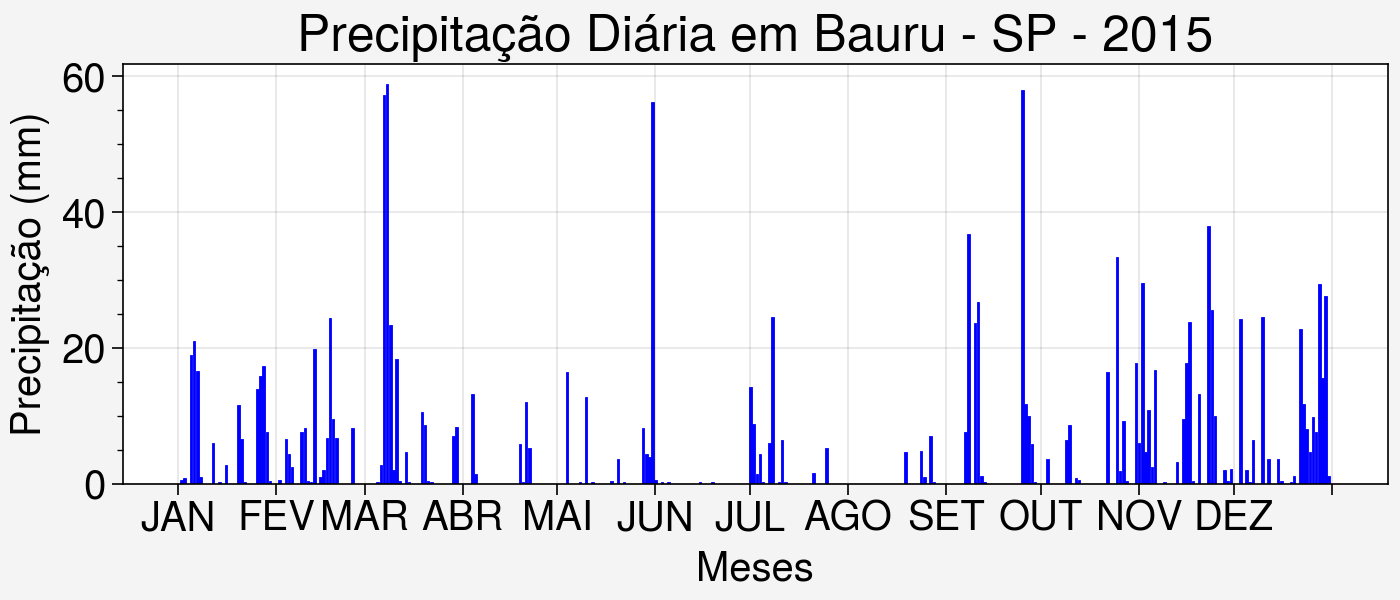

In [ ]:
# Fazendo o plot
fig, ax = plot.subplots(figsize = (7,3), tight = True)

ax.bar(bauru_pp_diaria_2015.index, bauru_pp_diaria_2015, color = 'blue')

ax.format(title = 'Precipitação Diária em Bauru - SP - 2015',\
          xlabel = 'Meses', ylabel = 'Precipitação (mm)',
          small = '20px', large = '25px', xrotation = 0,
          xlocator = 'month', xtickminor = False,
          xticklabels = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN',\
                         'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ'],
          xticks = 12)

plot.show()

# **Climograma**

O Climograma é um gráfico de representação das principais variáveis meteorológicas (precipitação e temperaturas) ao longo dos meses.

Por convenção da OMM, um climograma é criado a partir de médias de um período padronizado em 30 anos. Mas neste caso, o climograma vai ser gerado com a data disponível.

Para construir o nosso climograma, vamos mais uma vez usar o **groupby()** para agrupar os nossos dados de acordo com os meses **index.month** e, por fim, calcularmos as "normais" climatológicas.

In [ ]:
# FAZENDO UM CLIMOGRAMA

bauru_climatologia = bauru_media_diaria.groupby(bauru_media_diaria.index.month).mean()

Para o caso da precipitação é necessário fazer um pre-processamento desses dados:
- Calcular os acumulados mensais para o período disponível.
- Calcular a média dos acumulados e agregar esse novo valor ao DataFrame (sustituir o valor anterior)

In [ ]:
# Calculando acumulados de precipitação mensais
# Fazer médias mensais dos acumulados de precipitação

# Acumulado mensal
bauru_pp_mensal = bauru_media_diaria['Prec'].groupby(pd.Grouper(freq = '1M')).sum()

# Média climatológica de precipitação
bauru_climatologia['Prec'] = bauru_pp_mensal.groupby(bauru_pp_mensal.index.month).mean()

Os climogramas apresentam dois eixos Y. O primeiro eixo é de precipitação e o segundo de temperatura, o que significa que todas as variáveis compartilham o mesmo eixo x dos meses.

O Matplotlib e Proplot podem criar eixos "gêmeos", tanto para o eixo x .twinx() quanto y .twiny():

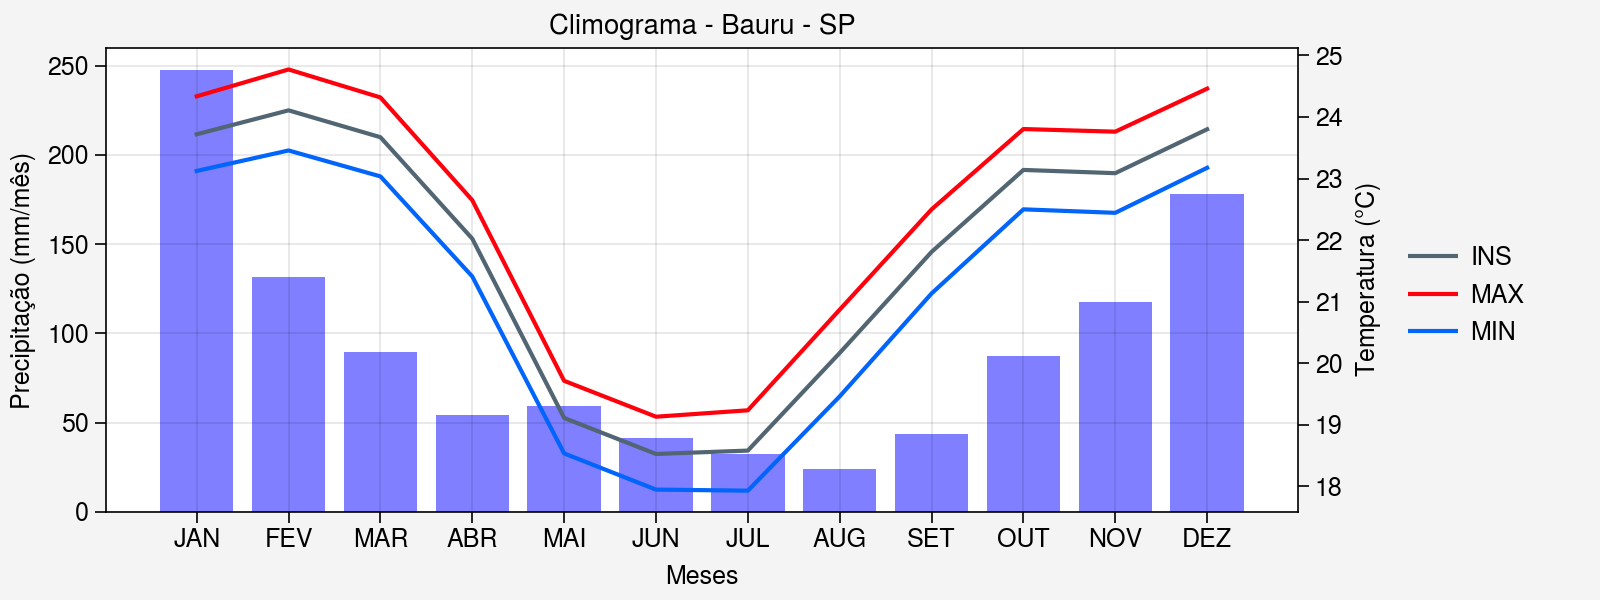

In [ ]:
# Fazendo um plot com dos eixos Y
fig, ax = plot.subplots(figsize = (8,3), tight = True)

# eixos gêmeos em X
ax2 = ax.twinx()

# Precipitação
ax.bar(plot.arange(1,12,1), bauru_climatologia['Prec'], color = 'Blue', alpha = 0.5)

# Temperaturas
ax2.plot(plot.arange(1,12,1), bauru_climatologia['Tins'], color = 'slate', label='INS')
ax2.plot(plot.arange(1,12,1), bauru_climatologia['Tmax'], color = 'bright red', label='MAX')
ax2.plot(plot.arange(1,12,1), bauru_climatologia['Tmin'], color = 'bright blue', label='MIN')

# Edição dos eixos
ax.format(title = 'Climograma - Bauru - SP',
          xlabel = 'Meses', ylabel = 'Precipitação (mm/mês)',
          xticklabels = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN',\
                         'JUL', 'AUG', 'SET', 'OUT', 'NOV', 'DEZ'],
          xticks = plot.arange(1,12,1),
          xtickminor = False, ytickminor = False)

ax2.format(ylabel = 'Temperatura ($\degree$C)', ytickminor = False)

# Legenda
ax2.legend(bbox_to_anchor = (1.2, 0.6), ncols = 1, frameon = False)

plt.show()